# AirBnB NY Locations Data Case Study

In this final project, you task will be to take the data provided and find evidance to answer the following questions.

1. Which hosts are the busiest and why?
2. How many neighborhood groups are available and which shows up the most?
3. Are private rooms the most popular in manhattan?
4. Which hosts are the busiest and based on their reviews?
5. Which neighorhood group has the highest average price?
6. Which neighborhood group has the highest total price?
7. Which top 5 hosts have the highest total price?
8. Who currently has no (zero) availability with a review count of 100 or more?
9. What host has the highest total of prices and where are they located?
10. When did Danielle from Queens last receive a review?

You will be given **4 hours** to complete this assignment. 
**Be Advised** I will go dark for this intire assignment time period. That said, any questions that you would like to ask about the data, or the project **MUST** be asked before the time starts. Once the time has started, I can no longer give information.

This is to similate what you will face when you are out in the wild. 

Happy Coding!

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

In [5]:
air_bnb = pd.read_csv('AB_NYC_2019.csv')
air_bnb.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [6]:
air_bnb.keys()


Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [7]:
# Which hosts are the busiest and why?

air_bnb_hosts = air_bnb.groupby(['host_name', 'calculated_host_listings_count', 'availability_365']).count()
air_bnb_hosts_sorted = air_bnb_hosts.sort_values('calculated_host_listings_count', ascending=False)
air_bnb_hosts_sorted.filter(['host_name', 'calculated_host_listings_count', 'availability_365'])





# air_bnb_host_id = air_bnb.groupby(['host_id', 'host_name', 'calculated_host_listings_count']).count()

# air_bnb_hosts = air_bnb_host_id.groupby(['host_name', 'host_id', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews', 'reviews_per_month', 'last_review']).size().reset_index()


# # air_bnb_hosts.sort_values('calculated_host_listings_count', ascending=False)

# air_bnb_hosts.sort_values('availability_365')


#  Sonder(NYC) is the busiest host.  they have the most listings as well as quite a few reviews.  
#  Blueground is the next busiest based on the number of listings.

Empty DataFrame
Columns: []
Index: [(Sonder (NYC), 327, 221), (Sonder (NYC), 327, 330), (Sonder (NYC), 327, 328), (Sonder (NYC), 327, 327), (Sonder (NYC), 327, 326), (Sonder (NYC), 327, 325), (Sonder (NYC), 327, 324), (Sonder (NYC), 327, 323), (Sonder (NYC), 327, 322), (Sonder (NYC), 327, 319), (Sonder (NYC), 327, 318), (Sonder (NYC), 327, 317), (Sonder (NYC), 327, 316), (Sonder (NYC), 327, 315), (Sonder (NYC), 327, 314), (Sonder (NYC), 327, 313), (Sonder (NYC), 327, 312), (Sonder (NYC), 327, 311), (Sonder (NYC), 327, 310), (Sonder (NYC), 327, 309), (Sonder (NYC), 327, 306), (Sonder (NYC), 327, 304), (Sonder (NYC), 327, 303), (Sonder (NYC), 327, 302), (Sonder (NYC), 327, 299), (Sonder (NYC), 327, 298), (Sonder (NYC), 327, 297), (Sonder (NYC), 327, 295), (Sonder (NYC), 327, 294), (Sonder (NYC), 327, 329), (Sonder (NYC), 327, 331), (Sonder (NYC), 327, 365), (Sonder (NYC), 327, 332), (Sonder (NYC), 327, 361), (Sonder (NYC), 327, 360), (Sonder (NYC), 327, 358), (Sonder (NYC), 327, 357), (Sonder (NYC), 327, 356), (Sonder (NYC), 327, 355), (Sonder (NYC), 327, 354), (Sonder (NYC), 327, 353), (Sonder (NYC), 327, 352), (Sonder (NYC), 327, 350), (Sonder (NYC), 327, 349), (Sonder (NYC), 327, 348), (Sonder (NYC), 327, 347), (Sonder (NYC), 327, 346), (Sonder (NYC), 327, 345), (Sonder (NYC), 327, 344), (Sonder (NYC), 327, 343), (Sonder (NYC), 327, 342), (Sonder (NYC), 327, 341), (Sonder (NYC), 327, 340), (Sonder (NYC), 327, 339), (Sonder (NYC), 327, 338), (Sonder (NYC), 327, 337), (Sonder (NYC), 327, 336), (Sonder (NYC), 327, 335), (Sonder (NYC), 327, 334), (Sonder (NYC), 327, 333), (Sonder (NYC), 327, 293), (Sonder (NYC), 327, 292), (Sonder (NYC), 327, 291), (Sonder (NYC), 327, 289), (Sonder (NYC), 327, 220), (Sonder (NYC), 327, 219), (Sonder (NYC), 327, 215), (Sonder (NYC), 327, 193), (Sonder (NYC), 327, 190), (Sonder (NYC), 327, 159), (Sonder (NYC), 327, 158), (Sonder (NYC), 327, 153), (Sonder (NYC), 327, 140), (Sonder (NYC), 327, 137), (Sonder (NYC), 327, 133), (Sonder (NYC), 327, 130), (Sonder (NYC), 327, 125), (Sonder (NYC), 327, 117), (Sonder (NYC), 327, 113), (Sonder (NYC), 327, 111), (Sonder (NYC), 327, 108), (Sonder (NYC), 327, 105), (Sonder (NYC), 327, 99), (Sonder (NYC), 327, 91), (Sonder (NYC), 327, 83), (Sonder (NYC), 327, 82), (Sonder (NYC), 327, 81), (Sonder (NYC), 327, 76), (Sonder (NYC), 327, 62), (Sonder (NYC), 327, 58), (Sonder (NYC), 327, 37), (Sonder (NYC), 327, 232), (Sonder (NYC), 327, 234), (Sonder (NYC), 327, 237), (Sonder (NYC), 327, 268), (Sonder (NYC), 327, 286), (Sonder (NYC), 327, 285), (Sonder (NYC), 327, 284), (Sonder (NYC), 327, 281), (Sonder (NYC), 327, 280), ...]

[35118 rows x 0 columns]

In [8]:
# How many neighborhood groups are available and which shows up the most?
#  There are 5 neighborhoods.  based on the number of listings, Manhattan shows up the most as it has the most listings.


air_bnb_neighbourhood = air_bnb.groupby(['neighbourhood_group']).count().reset_index()
air_bnb_most_popular = air_bnb_neighbourhood.groupby(['calculated_host_listings_count', 'host_id']).sum()

# air_bnb_neighbourhood.describe()

# air_bnb_neighbourhood
air_bnb_most_popular.filter(['calculated_host_listings', 'host_id', 'neighbourhood_group'])

,,neighbourhood_group
calculated_host_listings_count,host_id,
373,373,Staten Island
1091,1091,Bronx
5666,5666,Queens
20104,20104,Brooklyn
21661,21661,Manhattan


In [9]:
# Are private rooms the most popular in manhattan?
# No, entire home/apt is the most popular type with private rooms being next

air_bnb_room_type = air_bnb.groupby(['neighbourhood_group', 'room_type']).size()

air_bnb_room_type



neighbourhood_group  room_type      
Bronx                Entire home/apt      379
                     Private room         652
                     Shared room           60
Brooklyn             Entire home/apt     9559
                     Private room       10132
                     Shared room          413
Manhattan            Entire home/apt    13199
                     Private room        7982
                     Shared room          480
Queens               Entire home/apt     2096
                     Private room        3372
                     Shared room          198
Staten Island        Entire home/apt      176
                     Private room         188
                     Shared room            9
dtype: int64

In [26]:
# Which hosts are the busiest and based on their reviews?
# Dona is the busiest based on total reviews.  If you were to look at reviews per month however, Ken is the busiest.

air_bnb_reviews = air_bnb.groupby(['host_id', 'host_name', 'number_of_reviews']).count()

air_bnb_hosts_busy = air_bnb_reviews.groupby(['host_name', 'host_id', 'number_of_reviews', 'reviews_per_month']).size().reset_index()


air_bnb_hosts_busy.sort_values('number_of_reviews', ascending=False)
# air_bnb_hosts_busy.sort_values('reviews_per_month', ascending=False)

,host_name,host_id,number_of_reviews,reviews_per_month,0
11890,Dona,47621202,629,1,1
20680,Jj,4734398,607,1,1
20679,Jj,4734398,597,1,1
20678,Jj,4734398,594,1,1
11889,Dona,47621202,576,1,1
...,...,...,...,...,...
16918,Helen,165907758,0,0,1
36910,Rodney,45557152,0,0,1
36912,Rodney,190085120,0,0,1
36914,Rodrigo,869758,0,0,1


In [43]:
# Group by 'neighbourhood_group' and sum the 'number_of_reviews'
reviews_sum_by_group = air_bnb.groupby('neighbourhood_group')['number_of_reviews'].sum()

# Display the result
print(reviews_sum_by_group)


neighbourhood_group
Bronx             28371
Brooklyn         486574
Manhattan        454569
Queens           156950
Staten Island     11541
Name: number_of_reviews, dtype: int64


In [12]:
#  Which neighorhood group has the highest average price?
#  Manhattan has the highest average price, followed by Brooklyn

air_bnb_avg_price_per_neighbourhood = air_bnb.groupby('neighbourhood_group')['price'].mean()

air_bnb_avg_price_per_neighbourhood


neighbourhood_group
Bronx             87.496792
Brooklyn         124.383207
Manhattan        196.875814
Queens            99.517649
Staten Island    114.812332
Name: price, dtype: float64

In [13]:
# Which neighbor hood group has the highest total price?
#  Manhattan again has the highest total price.

air_bnb['total_price'] = air_bnb['minimum_nights'] * air_bnb['price']
air_bnb_total_price = air_bnb.groupby('neighbourhood_group')['total_price'].max()

air_bnb_total_price




neighbourhood_group
Bronx              18250
Brooklyn          478800
Manhattan        1170000
Queens           1000000
Staten Island      36500
Name: total_price, dtype: int64

In [14]:
#Which top 5 hosts have the highest total price?

air_bnb_host_highest_price = air_bnb.sort_values(by='total_price', ascending=False).filter(['host_name', 'total_price'])
air_bnb_host_highest_price.head(5)




,host_name,total_price
48043,Jenny,1170000
9151,Kathrine,1000000
12342,Amy,989901
17811,Iveta,857750
44429,Noelle,730000


In [16]:
# Who currently has no (zero) availability with a review count of 100 or more?


air_bnb[(air_bnb['number_of_reviews'] >= 100) & (air_bnb['availability_365'] == 0)].filter(['host_name', 'number_of_reviews', 'availability_365'])


,host_name,number_of_reviews,availability_365
8,MaryEllen,118,0
94,Christiana,168,0
132,Sol,193,0
174,Coral,114,0
180,Doug,206,0
...,...,...,...
29581,Kathleen,103,0
30461,Janet,119,0
31250,Albert,102,0
32670,Stephany,131,0


In [17]:
# What host has the highest total of prices and where are they located?
air_bnb_host_highest_price = air_bnb.sort_values(by='total_price', ascending=False).filter(['host_name', 'total_price', 'neighbourhood_group', 'neighbourhood'])
air_bnb_host_highest_price.head(5)


,host_name,total_price,neighbourhood_group,neighbourhood
48043,Jenny,1170000,Manhattan,Tribeca
9151,Kathrine,1000000,Queens,Astoria
12342,Amy,989901,Manhattan,Lower East Side
17811,Iveta,857750,Queens,Forest Hills
44429,Noelle,730000,Queens,Astoria


In [18]:
# When did Danielle from Queens last receive a review?


air_bnb[(air_bnb['host_name'] == 'Danielle') & (air_bnb['neighbourhood_group'] == 'Queens') & (air_bnb['last_review'])].filter(['host_name', 'neighbourhood_group', 'last_review']).sort_values('last_review', ascending=False)



,host_name,neighbourhood_group,last_review
22469,Danielle,Queens,2019-07-08
21517,Danielle,Queens,2019-07-07
20403,Danielle,Queens,2019-07-06
22068,Danielle,Queens,2019-07-06
7086,Danielle,Queens,2019-07-03
33861,Danielle,Queens,2019-06-20
27021,Danielle,Queens,2018-01-02


## Further Questions

1. Which host has the most listings?

In [19]:
# Sonder(NYC) has the most listings.

air_bnb_listings = air_bnb.groupby(['calculated_host_listings_count', 'host_name']).count()
air_bnb_listings.filter(['host_name', 'calculated_host_listings']).sort_values('calculated_host_listings_count', ascending=False)




Empty DataFrame
Columns: []
Index: [(327, Sonder (NYC)), (232, Blueground), (121, Kara), (103, Kazuya), (96, Sonder), (96, Jeremy & Laura), (91, Corporate Housing), (87, Ken), (65, Pranjal), (52, Vida), (52, Mike), (50, Stanley), (49, Ruchi), (49, Red Awning), (47, John), (43, Stat), (39, Host), (37, Hiroki), (34, Melissa), (34, Juliana), (33, Yaacov), (33, Rated), (33, Anting), (32, Eyal), (31, CRNY Monthly Rentals), (31, Jeniffer), (30, Gabriel), (29, AFI Apartments), (28, The Box House Hotel), (28, Max), (27, Nina), (26, Anthony), (25, Zach), (25, Emily), (23, Yuval), (23, Adam), (23, Kyle), (21, Benjamin), (20, Irina), (20, Erin), (19, Michael), (18, Petya), (18, Hillside Hotel), (18, Bluebird), (17, Anchor), (17, Alberto), (17, Melissa), (17, Nina), (16, Inna), (15, Shogo), (15, Randy), (15, Manhattan At Times Square), (15, Elem), (15, Alan), (14, Ash), (14, Nina), (14, Dee), (14, Sergii), (14, Park Lane), (13, Yun), (13, Vie), (13, The Knickerbocker), (13, Studioplus), (13, ResortShare5), (13, John), (13, Izi), (13, Henry Norman), (13, Brooklyn&   Breakfast    -Len-), (13, Aminul), (12, Baboucarr), (12, Chayla), (12, Cecile), (12, Gal), (12, Amy), (12, Alex And Zeena), (12, David), (12, Antony), (12, Laura), (12, Sally), (12, Shirley), (12, Tny), (12, Michael), (12, Wynpoints), (12, Yan), (11, Janet), (11, Chadanut), (11, Chamber Hotel), (11, Eliahu), (11, Graham And Ben), (11, Henry), (11, Jessica), (11, Melly), (11, Richard), (11, Yasu & Akiko), (10, Jasmine), (10, Abby), (10, Armando), (10, Arthouse Hotel), (10, Bobi), (10, Caroline), ...]

[13623 rows x 0 columns]

2. How many listings have completely open availability?

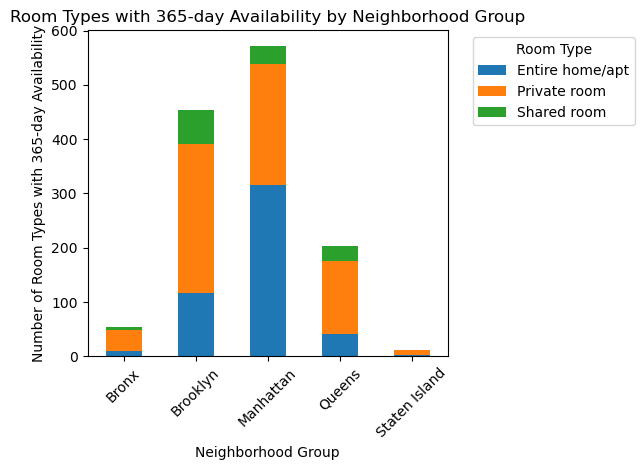

In [21]:
air_bnb[(air_bnb['availability_365'] == 365)].filter(['host_name', 'availability_365', 'room_type'])


df = pd.read_csv('AB_NYC_2019.csv')
df_365 = df[df['availability_365'] == 365]

grouped_data = df_365.groupby(['neighbourhood_group', 'room_type']).size().unstack(fill_value=0)


# Plot the data
grouped_data.plot(kind='bar', stacked=True)
plt.xlabel('Neighborhood Group')
plt.ylabel('Number of Room Types with 365-day Availability')
plt.title('Room Types with 365-day Availability by Neighborhood Group')
plt.xticks(rotation=45)
plt.legend(title='Room Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


3. What room_types have the highest review numbers?

In [22]:
air_bnb_room_type = air_bnb.groupby('room_type')['number_of_reviews'].sum()
air_bnb_room_type


room_type
Entire home/apt    580403
Private room       538346
Shared room         19256
Name: number_of_reviews, dtype: int64

# Final Conclusion

In this cell, write your final conclusion for each of the questions asked.

Also, if you uncovered some more details that were not asked above, please discribe them here.

-- Add your conclusion --

In [ ]:
# After analyzing the data provided, I was able to determine that Manhattan 
# has the most hosts and listings, and the highest average and total prices.  
# Brooklyn received the most reviews.  The Bronx is the most affordable with
# the lowest average cost and total cost of the groups.  There are less options 
# in the Bronx and they have low availability with less than 100 fully open options.  

# Based on all the data, if I was being asked which was the best option to choose
# for a stay, I would choose a place in Brooklyn.  There are enough reviews for me
# to go over, the total costs are lower than Manhattan, and the availibility is not 
# totally open, but not full either. 
